Step 7: 2D Linear Convection
----------------
***

Up to now, all of our work has been in one spatial dimension. We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas. Let's get started!

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.  

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.  

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

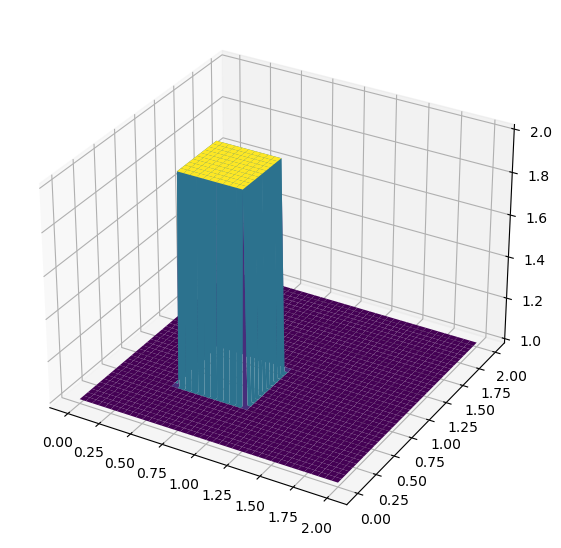

In [1]:
from mpl_toolkits.mplot3d import Axes3D #New library required for projected 3d plots
import numpy as np
from matplotlib import pyplot as plt, cm

#variables declarations

nx = 81
ny = 81
nt = 100
c = 1

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma =.2
dt = sigma * dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,nx)

u = np.ones((nx,ny)) # create 2d array of 1's
un = np.ones((nx,ny)) # placeholder

## inital conditions

# set hat function I.C.: u(0.5<=x<=1 && 0.5<=y<=1) = 2
u[int(0.5/dx):int(1/dx + 1),int(0.5/dy):int(1/dy + 1)] = 2

#plot initical condition
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)


### Iterating in two dimensions
To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 
$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$


In [2]:
%%timeit
u = np.ones((nx,ny))
u[int(0.5/dx):int(1/dx + 1),int(0.5/dy):int(1/dy + 1)] = 2

#loop across number of time steps
for n in range(nt):
    un = u.copy()
    row, col = u.shape
    for i in range(1,row):
        for j in range(1,col):
            u[i,j] = (un[i,j] - (c * dt / dx * (un[i,j] - un[i-1,j])) -
                                (c * dt / dy * (un[i,j] - un[i,j-1])))
            u[0,:] = 1
            u[:,0] = 1



770 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Here's a detailed explanation of the %%timeit magic command:

**Temporary Execution**: The %%timeit magic command executes the code in a separate scope or context. It runs the code several times (for timing and averaging purposes) in a temporary context. Any changes made to variables, including arrays, within the %%timeit block do not affect the variables in the main environment.

**No Permanent Changes**: Since %%timeit is designed for measuring performance and not for making permanent changes to variables or data structures, any update or modification to an array inside a %%timeit cell is not reflected outside that cell.

**Array Unchanged**: As a result, when you update an array within a %%timeit cell and then try to view the array outside of this cell, you'll see the original, unchanged array. The updates you made inside %%timeit do not persist.

To observe the changes you've made to an array, you need to update the array outside of the %%timeit cell. You can then use %%timeit separately to measure the performance of the update operation without expecting it to modify the array for later use.

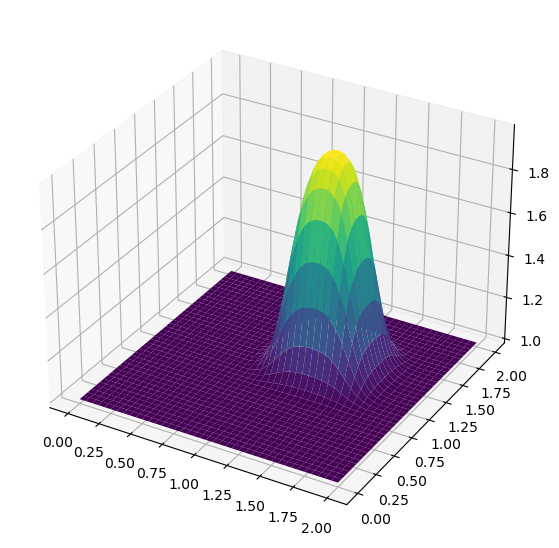

In [3]:
u = np.ones((nx,ny))
u[int(0.5/dx):int(1/dx + 1),int(0.5/dy):int(1/dy + 1)] = 2

#loop across number of time steps
for n in range(nt):
    un = u.copy()
    row, col = u.shape
    for i in range(1,row):
        for j in range(1,col):
            u[i,j] = (un[i,j] - (c * dt / dx * (un[i,j] - un[i-1,j])) -
                                (c * dt / dy * (un[i,j] - un[i,j-1])))
            u[0,:] = 1
            u[:,0] = 1

fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)

### Array Operations

Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.  

In [4]:
%%timeit
u = np.ones((nx,ny))
u[int(0.5/dx):int(1/dx + 1),int(0.5/dy):int(1/dy + 1)] = 2

# loop across number of time steps
for n in range(nt):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (c * dt / dx * (un[1:,1:] - un[:-1,1:])) -
                            (c * dt / dy * (un[1:,1:] - un[1:,:-1])))
    u[0,:] = 1
    u[:,0] = 1
    


2.61 ms ± 59.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


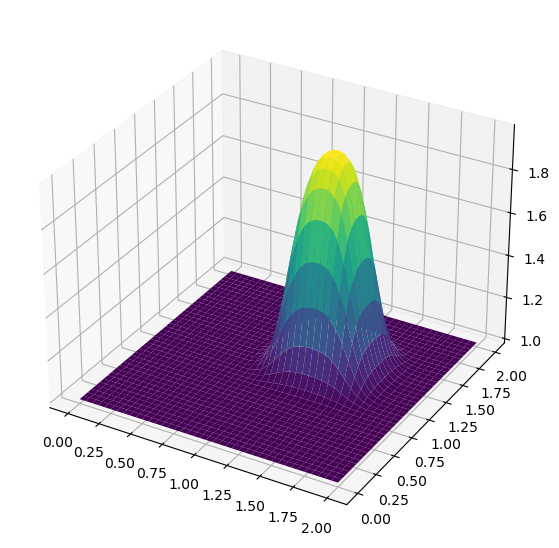

In [5]:
u = np.ones((nx,ny))
u[int(0.5/dx):int(1/dx + 1),int(0.5/dy):int(1/dy + 1)] = 2

# loop across number of time steps
for n in range(nt):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (c * dt / dx * (un[1:,1:] - un[:-1,1:])) -
                            (c * dt / dy * (un[1:,1:] - un[1:,:-1])))
    u[0,:] = 1
    u[:,0] = 1


fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)    

It's evident that the array operations approach significantly outperforms the for-loop method in terms of speed and efficiency!